<h1><center> Programming for AMEP </center></h1>

<h1><center> Lab 4: Numerical solution of differential equations </center></h1>

As for the previous lab: try to understand the code and anticipate the output before you run the cell. Did it confirm your guess? Great! If not, try to understand why, and, if needed, ask questions to your colleagues, or during the lab session.

Do not hesitate to send us an email if there is something you do not understand, or have any questions.

Reminder for Jupyter notebook: Check [here](https://www.markdownguide.org/basic-syntax/) for more details on the Markdown syntax. You can change the cell type by selecting Cell > Cell Type.

<h2><center> Part 0 - Feedback on last week's exercises </center></h2>
<h2>1. Comments on Exercise H3</h2>


 1. For all the points on a condutor (including the cavity borders), the potential has a fixed value;
 
 2. For all the points within the cavity, the potential starts with an initial value $V_{i,j}=0$, we then update the values of all the $V_{i,j}$ with the following formula:
 
$$V_{i,j}=\displaystyle\frac{V_{i-1,j}+V_{i,j-1}+V_{i+1, j}+V_{i,j+1}}{4}$$

i.e., for each point on the lattice, the potential take the value of the mean of its four neighboors.

 3. We iterate point 2. until we reach a good convergence.

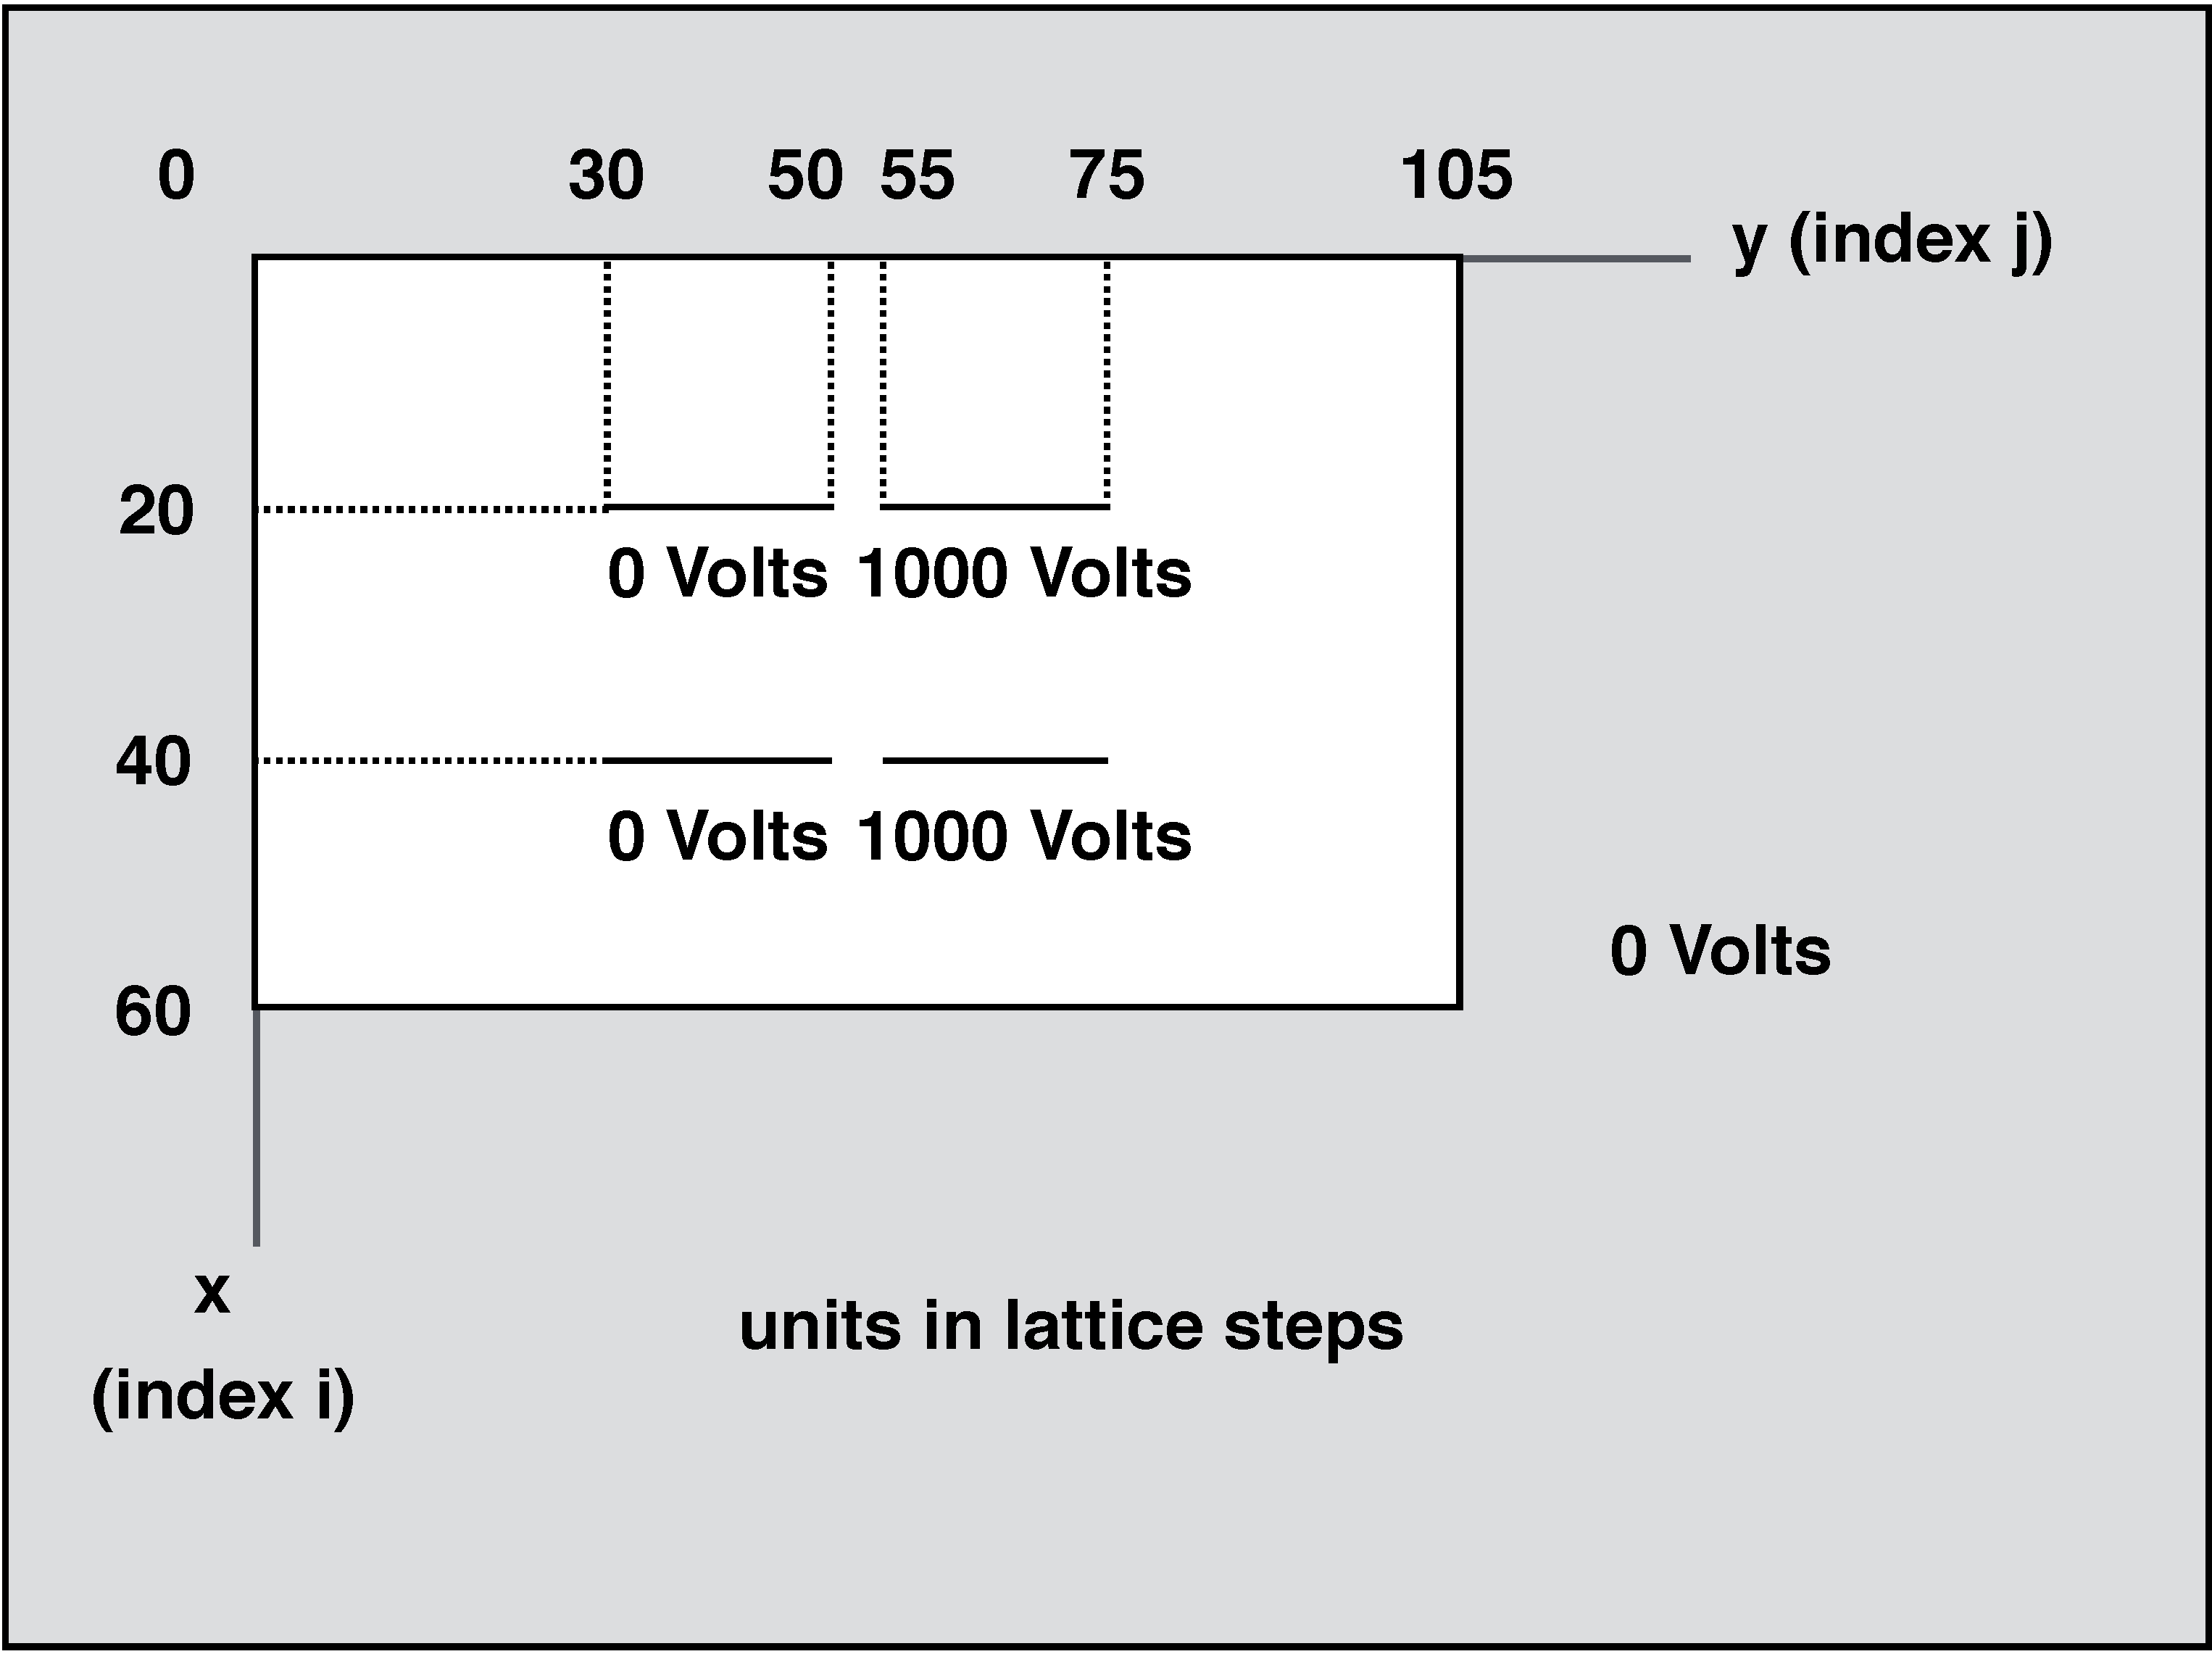

In [90]:
from IPython.display import Image
Image('Laplace_fig.png', width=500)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
## Answer to Q1 -- Version 1:
## Using two Python loops over the lattice:

# Update the potential inside the cavity:    
def Update(V):
    V2=np.copy(V)
    for i in range(1,60):     # Note: leave the boundary of the lattice at i=0 and i=60 unchanged
        for j in range(1,105):     # Note: leave the boundary of the lattice at j=0 and j=105 unchanged
            if (i!=20 and i!=40) or (j<30) or (j>50 and j<55) or (j>75):  # update only outside of the plates
                V[i,j]=(V2[i,j-1]+V2[i,j+1]+V2[i-1,j]+V2[i+1,j])/4.    # Local update rule

# Iterations:                
def Solve_Laplace(V_init, Nit):
    V=np.copy(V_init)        # Make an initial copy
    for _ in range(Nit):     # Loop over the number of iterations 
        Update(V)
    return V

In [ ]:
## Answer to Q1 -- Version 2:
## Using NumPy's UFunc: faster solution
       
def Update2(V): 
    V2=np.copy(V)
    V[1:-1,1:-1] = (V2[:-2,1:-1] + V2[2:,1:-1] + V2[1:-1,:-2] + V2[1:-1,2:])/4.
    # we re-fix the value of on the 4 conductors
    V[20, 55:76] = 1000
    V[40, 55:76] = 1000
    V[20, 30:51] = 0
    V[40, 30:51] = 0

def Solve_Laplace2(V_init, Nit): 
    V=np.copy(V_init)     # Make an initial copy
    for _ in range(Nit):  # Loop over the number of iterations 
        Update2(V)
    return V

**Comment about the second version of the code:** We only update the points that are not on the boundary, i.e., we are updating the elements of the slice <code>V[1:-1, 1:-1]</code> without the first and last column/row. This reduced matrix has two rows and two columns less than the original matrix. In each cell of this slice, we would like to sum the value of the 4 direct neighbouring cells.
By translating this reduced window by: 
 - one step to the left, 
 - one step to the right,
 - one step to the top,
 - one step to the bottom,

we create 4 translated windows that summed on top of each other will return the sum of all four neighbors.
Note that the 4 translated windows all have the same size, so there is no issue in summing them.

In [ ]:
# Define the initial potential V0:
V0=np.zeros((61,106), dtype=float)    # Grid of zeros:  V=0 everywhere
V0[20][55:76]=1000           # Define the two plates with V = 1000
V0[40][55:76]=1000

#plt.imshow(V0, origin ='lower', interpolation='none', cmap =cm.coolwarm);

In [ ]:
N=200

V1=Solve_Laplace(V0, N)
#plt.imshow(V1, origin ='lower', interpolation='none', cmap =cm.coolwarm);

V2=Solve_Laplace2(V0, N)
plt.imshow(V2, origin ='lower', interpolation='none', cmap =cm.coolwarm);

**<span style='color:red'>Q1.</span> Can you check that the two functions give the same results (up-to-numerical precision) at $N_{it}=200$?**<br>
**Can you test and compare the speed of each function for $N_{it}=200$?**

In [ ]:
# Check that the two solutions are the same:


In [ ]:
# Test of "Solve_Laplace()", that has two Python loops:


In [ ]:
# Test of "Solve_Laplace2()", that uses NumPy operations:


**<span style='color:red'>Comments:</span>  about encoding the precision epsilon:**

In [ ]:
## Answer to Q3:
def Solve_Laplace_bis(V_init, Nit, epsilon=1e-2):
    V1=np.copy(V_init)
    V2=np.copy(V_init)

    for t in range(Nit):
        Update2(V2)
        if ((np.abs(V2-V1)).max() ) < epsilon:
            break
        V1[:,:]=V2[:,:]  ## Copy all the elements of V2 in V1
    return V2, t    ### return V2 and the number of iterations

In [ ]:
Veps1,t_tot = Solve_Laplace_bis(V0, 2000, epsilon=1e-1)
print("Number of iteration needed to reach a precision of epsilon=0.1: Nit = ", t_tot)

In [ ]:
Veps2,t_tot = Solve_Laplace_bis(V0, 2000, epsilon=1e-2)
print("Number of iteration needed to reach a precision of epsilon=0.01: Nit = ", t_tot)

**Comments:** For $N_{it}=2000$ iterations, the solution had already converged with a precision of $0.01$.

<h2>2. Matplotlib</h2>

If Matplotlib is not already installed on you laptop, you must first install it (e.g., using <code>pip install matplotlib</code> in the terminal). Most of the Matplotlib utilities lies under the <code>pyplot</code> submodule, and are usually imported under the <code>plt</code> alias:

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<h3>Using Matplotlib interactively:</h3>

 - <code>%matplotlib notebook</code> will create interactive plots embedded within the notebook
 - <code>%matplotlib inline</code> will create static images of your plot embedded in the notebook

**<span style='color:red'>Ex 1.</span>** The <code>notebook</code> version can be quite useful for rotating a 3D-plot. For instance, try both options in the following 3d-plot from last week's exercise:

In [ ]:
%matplotlib inline
%matplotlib notebook

In [ ]:
## Answer to Q2:
def f(V,i,j):
    return V[i,j] 

x = np.arange(61)
y = np.arange(106)
X, Y = np.meshgrid(x, y)
Z2000 = f(Veps2,X,Y)

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z2000, rstride=1, cstride=1, cmap='viridis', edgecolor='k', linewidth=0.3);

<h3>Simple plots</h3>

Below are a few Matplotlib basics that will be useful in this lecture.

The <code>plt.plot()</code> function can be used to draw points (or "markers") in a figure.
The function takes two arguments:
 - an array containing the points on the x-axis.
 - an array containing the points on the y-axis.

See the example below:

In [ ]:
import numpy as np

x = np.linspace(0, 10)  # values linearly sampled from 0 to 10 (by default the sampling has num=50 points)
y = np.sin(x)           # sine of these values
plt.plot(x, y);         # plot with line

By default, the function draws lines between consecutive points.
The third argument of the function <code>plt.plot()</code> is a string that allows you to specify:

  - if you want to display the points (instead of a continuous line), and which symbol (marker) you want to use in that case;
  
  - the line style you want to use;
  
  - the color that you want to use. 

**<span style='color:red'>Q2.</span> In the following example, can you explain what the following options are used for: <code>'-ok'</code>,  <code>label='sin(x)'</code>, <code>num=100</code>? Why do we use the function <code>plt.legend()</code>, and what is the argument of this function?**


In [ ]:
x = np.linspace(0, 10, num=30)
plt.plot(x, np.sin(x), '-ok', label='sin(x)')

plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend(bbox_to_anchor=(1.3, 1.0))

**<span style='color:red'>Q3.</span> Can you plot on the same graph <code>sin(x)</code> with red cross connected by a red dotted line, and <code>cos(x)</code> with blue dots connected by a blue dashed line? Don't forget to add the legend! Can you add a title to the plot using <code>plt.title()</code>?** 

In [ ]:
# Answer to Q3:


<h2><center> Part 1 - First order Ordinary Differential Equations (ODEs) </center></h2>


<h2>1. First order ODE: </center></h2>

Consider the general form of first order ODEs:<br><br>
$$y^{\prime}(t)=F[y(t),\,t],
\qquad
\textrm{with the initial condition (IC):}\qquad y(t_0)=y_0.$$

$y$ is the unknown function of a single variable $t$, $y^{\prime}$ is its derivative, and $F$ is a given function of $t$ and $y(t)$.

<h2>2. The Euler method </center></h2>
 
The Euler method is a first-order numerical procedure for solving ordinary differential equations (ODEs) with a given initial value. The Euler method is named after Leonhard Euler, who treated it in his book *Institutionum calculi integralis* (published 1768–1870).

It is the simplest of all numerical methods for solving differential equations and serves as the basis to construct more complex methods.

It is a first-order method, which means that the global error (error at a given time) is proportional to the step size.

<h3>The method: </center></h3>

The method uses a first order approximation of the derivative $y^{\prime}(t)$ (as seen in Exo 6 of Lab 2), such that:<br><br>
\begin{align}
y(t+dt)&=y(t)+ y^{\prime}(t)\,dt\\
       &= y(t)+ F[y(t),\,t]\,dt
\end{align}

This allows to compute an approximate value of $y(t+dt)$ from the value of $y(t)$, and the smaller is the step $dt$ the more accurate is this approximate value. Starting from the initial condition, one can then compute $y(t_0+dt)$ from $y(t_0)$, and then $y(t_0+2\,dt)$ from $y(t_0+dt)$, and so on so forth, which finally gives a series of approximate values of the unique solution of the first order ODE.

<h3>Example: </center></h3>
For instance, let's take the following ODE:
\begin{align}
y^{\prime}(t)&=-t\,y(t), \qquad \textrm{with the IC:}\qquad  y(0)=1
\end{align}

whose analytical solution is $y(t)=\exp(-t^2\,/\,2)$.
It is clear that solving numerically an equation is useful only in case where we don't know the solution. However, knowing the solution here will allow us to check that our function is working properly.

**<span style='color:red'>Q4.</span> Write a function <code>F_ex(y, t)</code> that takes as an input a real numbers $t$ and the value of $y(t)$, and returns value of the value of $F[t, y(t)]=-t\,y(t)$ defining the above ODE.** 

In [ ]:
#answer to Q4:

**<span style='color:red'>Q5.</span> Write a function <code>Euler(F, y, t, dt)</code> that takes as an input a value of $t$, the corresponding value of $y(t)$, the function $F(y,t)$ defining the ODE, and a step $dt$, and that returns the value of $y(t+dt)$ using the Euler method.**

In [ ]:
#answer to Q5:


**<span style='color:red'>Q6.</span>  Write a function <code>Solve_ODE_Euler(F, y0, t0, tf, dt=1e-3)</code> that takes as an input**
 - the function $F$ defining the ODE,
 - the initial value $y_0=y(t_0)$,
 - the initial time $t_0$,
 - a final time $t_f$,
 - and a numerical step $dt$,
 
**and that returns a tuple with two np.arrays of the same size containing:**
 - the list of times $t$, every $dt$ between $t_0$ and $t_f$, 
 - and the list of $y(t)$ evaluated at these times.

In [ ]:
import numpy as np

In [ ]:
#answer to Q6:


**<span style='color:red'>Q7.</span>  Using matplotlib, plot the solution of the above ODE computed between $t_0=0$ and $t_f=3$, for step sizes of $dt=0.2$ and $dt=0.02$. Compare your results to the plot of the analytical solution $y(t)=\exp(-t^2\,/\,2)$. Remember to add the axis labels, the legend, and to give a title to your plot. Can you customize your plot in the following way?**
 - use scatter plots with small dots for your numerical solutions;
 - use a continuous black line to plot the analytical solution (you can use a higher resolution);
 - use two different colors for $dt=0.2$ and $dt=0.02$;
 - don't forget the axis labels and the legend.
 
**Comment on your results.**  

Note: You can change the size of your figure using <code>plt.figure(figsize=(12,8))</code> for instance.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
#plt.style.use('seaborn-white');
plt.rc('font', size=20)

In [ ]:
#answer to Q7:


<h3><span style='color:red'>Ex2.</span> First order method:</h3> At fixed time, the error grows roughly linearly with the step size $dt$. Check what happen below at fixed time:

In [ ]:
## Constants:
y0=1
t0=0
tf=0.8

## Plot:
plt.figure(figsize=(12,8))

## Exact solution: exp(-t*t/2)
t=np.linspace(t0,tf, 100)
y=np.exp(-t*t/2)
plt.plot(t,y,'-k')

## Euler:
dt_range=[0.4, 0.2, 0.1, 0.05, 0.025]

for dt in dt_range:
    t,y=Solve_ODE_Euler(F_ex, y0, t0, tf, dt)
    plt.plot(t, y, 'o', label="dt="+str(dt))

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solution  of  y\'(t) = -t y(t)')
plt.legend()

<h2>3. The Runge-Kutta method of order 4 (RK4) </center></h2>

The Runge–Kutta methods are a family of iterative methods, which include the Euler Method (as the simplest Runge–Kutta method), used in temporal discretization for the approximate solutions of ODE. These methods were developed around 1900 by the German mathematicians Carl Runge and Wilhelm Kutta. See [here](https://en.wikipedia.org/wiki/List_of_Runge–Kutta_methods) for a list of Runge-Kutta methods.

The most widely known member of the Runge–Kutta family is generally referred to as "RK4" (Runge-Kutta method of order 4). It is a fourth-order method, meaning that the total accumulated error is on the order of $O(h^4)$.

Similarly to the Euler method, this method allows to compute an approximate value of $y(t+dt)$ from the value of $y(t)$. The iteration function is more complicated, but the approximation is better.

<h3>The method: </center></h3>

The iteration procedure is the following:
\begin{align}
    y(t+dt) = y(t) + \frac{dt}{6}(k_1 + 2\,k_2+2\,k_3+k_4)
\end{align}
with
\begin{align}
\begin{cases}
    \displaystyle\;k_1 = F\,[y(t)\,, \,t]\\[1pt]
    \displaystyle\;k_2 = F\Big[y(t)+k_1\frac{dt}{2}\,,\,t+\frac{dt}{2}\Big]\\[1pt]
    \displaystyle\;k_3 = F\Big[y(t)+k_2\frac{dt}{2}\,,\,t+\frac{dt}{2}\Big]\\[1pt]
    \displaystyle\;k_4 = F\Big[y(t)+k_3\,dt\,,\,t+dt\Big]
\end{cases}
\end{align}

There are thus 4 intermediate quantities to compute in order to get $y(t+dt)$ from $y(t)$. 

<h3>Example: </center></h3>

Let us start with our example ODE:
\begin{align}
y^{\prime}(t)&=-t\,y(t), \qquad \textrm{with the IC:}\qquad  y(0)=1
\end{align}



**<span style='color:red'>Q8.</span>  Can you write a function <code>RK4(F, y, t, dt)</code> that takes as an input a value of $t$, the corresponding value of $y(t)$, the function $F(y,t)$ defining the ODE, and a step $dt$, and that returns the value of $y(t+dt)$ using the RK4 method?**

In [ ]:
#answer to Q8:



**<span style='color:red'>Q9.</span> Can you write a function <code>Solve_ODE_RK4(F, y0, t0, tf, dt=1e-3)</code> that does the same thing than the function <code>Solve_ODE_Euler(F, y0, t0, tf, dt=1e-3)</code>, but that uses the RK4 method instead of the Euler method? Re-use the code you wrote for question Q6.**

In [ ]:
#answer to Q9:
## We simply copied the code of Q6 and replaced the function "Euler()" by the function "RK4()":


**<span style='color:red'>Q10.</span> Using matplotlib, can you compare the numerical solutions of the above ODE computed between $t_0=0$ and $t_f=3$ with a step size $dt=0.1$, using respectively the Euler method and with the RK4 method (scatter plot)? Compare your result to the plot of the analytical solution $y(t)=\exp(-t^2\,/\,2)$. Comment on your results.**

In [ ]:
#answer to Q10:


<h3><span style='color:red'>Ex3.</span> Global Error: </center></h3> 

Let's vary $dt$ over the same range that we used previous with the Euler method: What do you observe?

In [ ]:
## Constants:
y0=1
t0=0
tf=3

## Plot:
plt.figure(figsize=(12,8))

## Exact solution: exp(-t*t/2)
t=np.linspace(t0,tf, 100)
y=np.exp(-t*t/2)
plt.plot(t,y,'-k')

## RK4:
dt_range=np.array([0.4, 0.2, 0.1, 0.05, 0.025])
error_range=[]

for dt in dt_range:
    t,y=Solve_ODE_RK4(F_ex, y0, t0, tf, dt)
    plt.plot(t, y, 'o', label="dt="+str(dt))
    error_range.append( np.abs(y[-1]-np.exp(-tf*tf/2)) )

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solution  of  y\'(t) = -t y(t)')
plt.legend()
plt.show()

On your previous graph, you should be able to see that, at the same value of the step $dt$, the precision of the computation with RK4 is much better than with Euler. In general, the Euler method is a very basic method, that is introduced here as it is simpler to explain the principle of these types of methods. However in general, you should prefer RK4 over Euler.

<h2><center> Part 2 - Systems of coupled first order ODEs </center></h2>

<h3>1. Coupled ODEs:</h3>

The same methods easily adapts to solve systems of coupled first order ordinary differential equations, which have the general form:

\begin{align}
\begin{cases}
   \; y_0^{\prime}(t)&=F_0 [y_0, \cdots, y_{n-1}, t]\\[1pt]
   \;\cdots&\\[1pt]
    \;y_{n-1}^{\prime}(t)&=F_{n-1} [y_0, \cdots, y_{n-1}, t]
\end{cases}
\end{align}

where $n$ is the dimension of the system, the $y_i$ are unknown functions of $t$, the $F_i$ are given functions of the $y_i(t)$ and $t$. Combining the $y_i$ as the elements of a vector $\boldsymbol{y}$, and the $F_i$ as the elements of a vector $\boldsymbol{F}$, one can re-write the system of ODEs as:

\begin{align}
    \boldsymbol{y}^{\prime}(t)=\boldsymbol{F}[\boldsymbol{y}(t), t]
\end{align}

Given an initial condition, $\boldsymbol{y}(t_0)=\boldsymbol{y}_0$, this system has a unique solution $\boldsymbol{y}(t)$.

<h3>2. Euler method:</h3>

The Euler method easily generalizes to a system of coupled ODEs, and the values of $\boldsymbol{y}(t+dt)$ is computed from $\boldsymbol{y}(t)$ using:

\begin{align}
    \boldsymbol{y}(t+dt)= \boldsymbol{y}(t)+\boldsymbol{F}[\boldsymbol{y}(t), t]\,dt
\end{align}

<h3>3. RK4 method:</h3>

The iteration procedure for RK4 can also be easily generalized for coupled ODEs:

\begin{align}
    \boldsymbol{y}(t+dt) = \boldsymbol{y}(t) + \frac{dt}{6}(\boldsymbol{k}_1 + 2\,\boldsymbol{k}_2+2\,\boldsymbol{k}_3+\boldsymbol{k}_4)
\end{align}
where
\begin{align}
\begin{cases}
    \displaystyle\;\boldsymbol{k}_1 = \boldsymbol{F}\,[\boldsymbol{y}(t)\,,\,t]\\[1pt]
    \displaystyle\;\boldsymbol{k}_2 = \boldsymbol{F}\Big[\boldsymbol{y}(t)+\frac{dt}{2}\,\boldsymbol{k}_1\,,\,t+\frac{dt}{2}\Big]\\[1pt]
    \displaystyle\;\boldsymbol{k}_3 = \boldsymbol{F}\Big[\boldsymbol{y}(t)+\frac{dt}{2}\,\boldsymbol{k}_2\,,\,t+\frac{dt}{2}\Big]\\[1pt]
    \displaystyle\;\boldsymbol{k}_4 = \boldsymbol{F}\Big[\boldsymbol{y}(t)+dt\,\boldsymbol{k}_3\,,\,t+dt\Big]
\end{cases}
\end{align}


<h3> 4. Example:</h3>

Let's consider the following system of 2 coupled ODEs:

\begin{align}
\begin{cases}
    &y_0^{\prime}(t)=y_1(t)\\[1pt]
    &y_1^{\prime}(t)=-y_0(t)
\end{cases}
\qquad\textrm{with the initial condition:}\qquad
\begin{cases}
    &y_0(0)=1 \\[1pt]
    &y_1(0)=0
\end{cases}
\end{align}

**<span style='color:blue'>Q11.</span> Can you write a function <code>F_ex_array(y_array, t)</code> that takes as an input a real numbers $t$ and an array <code>y_array</code> with 2 elements containing the values of $y_0(t)$ and $y_1(t)$, and that returns an array with the 2 values of $\boldsymbol{F}[t, \boldsymbol{y}(t)]$ defining the above ODE?**

**Can you explicitly write down the expression of $\boldsymbol{F}[\boldsymbol{y}(t), t]$ (using latex in markdown):** 

Answer to Q11, expression of $\boldsymbol{F}[\boldsymbol{y}(t), t]$:

\begin{align}
\boldsymbol{y}(t) =
\begin{pmatrix}
    y_0(t)\\[1pt]
    y_1(t)
\end{pmatrix}
\qquad
{\rm and}
\qquad
\boldsymbol{F}[\boldsymbol{y}(t), t] = 
\begin{pmatrix}
    y_1(t)\\[1pt]
    -y_0(t)
\end{pmatrix}
\end{align}

In [ ]:
# answer to Q11:



**<span style='color:blue'>Q12.</span> Check that the functions <code>Euler(F, y, t, dt)</code>, <code>Solve_ODE_Euler(F, y0, t0, tf, dt=1e-3)</code> , <code>RK4(F, y, t, dt)</code> and <code>Solve_ODE_RK4(F, y0, t0, tf, dt=1e-3)</code> still work if the scalar argument $y$ is replaced by an $n$-dimensional numpy array  representing $\boldsymbol{y}$, and if the scalar function $F(y, t)$ is now replaced by a function $\boldsymbol{F}(\boldsymbol{y},t)$ that takes as an input the real number $t$ and an $n$-dimensional array $\boldsymbol{y}$ and return an $n$-dimensional array $\boldsymbol{F}$.**

**Let's define the variables: <code>t,y = Solve_ODE_Euler(F_ex_array, y0, t0, tf, dt)</code>. What would then be the value returned by <code>y[0]</code>? by <code>y[1]</code>?**

In [ ]:
# answer to Q12:


**<span style='color:blue'>Q13.</span> The analytical solution of the studied coupled ODE is already known:**

\begin{align}
\begin{cases}
    &y_0(t)=\cos(t)\\[1pt]
    &y_1(t)=-\sin(t)
\end{cases}
\end{align}

**Can you plot, on the same graph, the analytical solution, and the numerical solutions obtained using the Euler method and the RK4 methods? Take a final time $t_f=7$ and a time step $dt=0.05$.**

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white');
plt.rc('font', size=20)

In [ ]:
# answer to Q13:

# Test Solve_ODE_Euler and Solve_ODE_RK4:



<h2><center> Part 3 - Second order ODEs </center></h2>

The differential equations we saw until now are all of first order as they only contain first order derivative. However the methods we saw easily generalise to equations with higher order derivatives.

<h3>1. Second order ODE:</h3>

Let us consider first a single general second order ODE, which can be defined by:

\begin{align}
    y^{\prime\prime}(t)=F[y(t), y^\prime(t), t]
\end{align}
with initial conditions $y(t_0)=y_0$ and $y^\prime(t_0)=y^\prime_0$. 

This equation can be re-written as a system of 2 coupled first order ODE if we introduce the auxiliary function $z(t)$, such that $z(t)=y^{\prime}(t)$:

\begin{align}
\begin{cases}
    y^{\prime}(t)=z(t)\\[1pt]
    z^{\prime}(t)=F[y(t), z(t), t]
\end{cases}
\qquad\textrm{with the IC:}\qquad
\begin{cases}
    y(t_0)=y_0\\[1pt]
    z(t_0)=y^\prime_0
\end{cases}
\end{align}

<h3>2. System of coupled second order ODEs:</h3>

Similarly, a systems of $n$ coupled second order ODEs with unknown solution $\boldsymbol{y}(t)$ can be re-written as a systems of $2n$ coupled first order ODEs with unknown solution $(\boldsymbol{y}(t), \boldsymbol{z}(t))$, where $\boldsymbol{z}(t)=\boldsymbol{y}^\prime(t)$:

\begin{align}
\begin{cases}
    \boldsymbol{y}^{\prime}(t)=\boldsymbol{z}(t)\\[1pt]
    \boldsymbol{z}^{\prime}(t)=F[\boldsymbol{y}(t), \boldsymbol{z}, t]
\end{cases}
\qquad\textrm{with the IC:}\qquad
\begin{cases}
    \boldsymbol{y}(t_0)=\boldsymbol{y}_0\\[1pt]
    \boldsymbol{z}(t_0)=\boldsymbol{y}^\prime_0
\end{cases}
\end{align}




<h3>3. Example:</h3>

Consider the second order ODE describing the driven harmonic oscillator:<br>

\begin{align}
    y^{\prime\prime}(t)=-y(t)+g(t)
    \qquad\textrm{with the initial conditions:}\qquad
\begin{cases}
    &y\,(t=0)=1 \\[1pt]
    &y^\prime(t=0)=0
\end{cases}
\end{align}

Note that for $g(t)=0$ (undriven harmonic oscillator), we recover the systems of coupled ODE taken as example in Part 2.4.


**<span style='color:blue'>Q14.</span> Can you write down the system of 2 coupled first order ODEs corresponding to this second order ODE?**

<span style='color:blue'>**Your answer:** the system of equations is: </span>

**Using the functions <code>Solve_ODE_Euler(F, y0, t0, tf, dt=1e-3)</code> and <code>Solve_ODE_RK4(F, y0, t0, tf, dt=1e-3)</code>, can you solve this system of equation for a driven harmonic oscillator with $g(t)=\sin(0.8\,t)$? Take $t_f=20$ and $dt=0.05$.**

**Compare to the known solution of the undriven system. How does the solution change?**

In [ ]:
# answer of Q14:

In [ ]:
## answer of Q14: Plot


<h2><center> Part 4 - Solving ODEs with SciPy </center></h2>

<h3>1. Scipy</center></h3>

SciPy is a collection of scientific functionality that is built on NumPy. The package began as a set of Python wrappers to well-known Fortran libraries for numerical computing, and has grown from there. The package is arranged as a set of submodules, each implementing some class of numerical algorithms. Here is an incomplete sample of some of the more important ones for data science:
 - <code>scipy.fftpack</code>: Fast Fourier transforms
 - <code>scipy.integrate</code>: Numerical integration
 - <code>scipy.interpolate</code>: Numerical interpolation
 - <code>scipy.linalg</code>: Linear algebra routines
 - <code>scipy.optimize</code>: Numerical optimization of functions
 - <code>scipy.sparse</code>: Sparse matrix storage and linear algebra
 - <code>scipy.stats</code>: Statistical analysis routines
 
 
<h3>2. scipy.integrate</center></h3>

Functions to solve ODEs are available in the scipy module <code>scipy.integrate</code>. There are currently two main function available: <code>odeint()</code> and <code>solve_ivp</code>. See [here](https://danielmuellerkomorowska.com/2021/02/16/differential-equations-with-scipy-odeint-or-solve_ivp/) for more information and a detailed comparison of these functions.

The two solvers are based on different methods: the default method of <code>odeint()</code> is LSODA, which uses Adams methods (predictor-corrector), while the default integration method of <code>solve_ivp</code> is RK45 (see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)).

The newer one is <code>solve_ivp</code> and it is recommended but <code>odeint()</code> is still widespread, probably because of its simplicity. Here we will focus on <code>odeint()</code>.


In [304]:
from scipy.integrate import odeint

The general function call is <code>y=odeint(F, y0, t)</code>.

The argument of the functions are:
 - <code>F</code>: a function $\boldsymbol{F}(\boldsymbol{y}, t)$ that takes a 1d-array and a scalar and returns a 1d-array;
 - <code>y0</code>: a 1d-array with the initial values of $\boldsymbol{y}$
 - <code>t</code>: an array of the values of $t$ at which $\boldsymbol{y}(t)$ will be computed. The first entry of this array must be the initial time at which the initial value <code>y0</code> applies;
 - <code>y</code>: a 1d-array with the values of $\boldsymbol{y}(t)$ computed at the values of $t$ specified in the <code>t</code> array.

**<span style='color:blue'>Q15.</span> Can you solve the equation of part 3.3 using <code>odeint()</code> and compare the result to your previous numerical results, obtained with Euler and RK4?**

In [ ]:
### Solution with odeint():


In [ ]:
# Comparison with Solve_ODE_Euler and Solve_ODE_RK4:

<h1><center> Homework </center></h1>

### Exo1.  Questions above:

For the homework, please answer the <span style='color:blue'>**questions Q11 to Q15**</span> highlighted in blue above.


### Exo2. Modeling neuronal activity with the FitzHugh-Nagumo model

In this exercise you will solve numerically the excitable oscillator proposed in the FitzHugh-Nagumo model. This is a toy model (i.e. a simple way to represent the basic behaviour of something) for the Hodgkin-Huxley neuron. As simple as it may seem, it allows to reproduce the different regimes that can be experimentally observed in neurons. In particular, this model allows to reproduce the regime that Hodgkin and Huxley observed on the giant axon of a squid (something that made them win the Nobel Prize in Physiology in 1963!).

The model consists of the following system of coupled differential equations:

\begin{align}
\begin{cases}
    &\displaystyle\frac{dv}{dt}(t)=v(t)\,[a-v(t)]\,[v(t)-1]-\omega(t) +I_{ext}\\[1mm]
    &\displaystyle\frac{d\omega}{dt}(t)=b\,v(t)-c\,\omega(t)
\end{cases}
\end{align}

where the function $v(t)$ represents the potential of the neuron, and the function $\omega(t)$ is an auxiliary function that captures changes in the dynamics of the activity.
 
The constants $a$, $b$, $c$ and $I_{ext}$ are parameters; $I_{ext}$ represents the input current received by the neuron (the stimulus). In the following analysis, we fix the values of $a,\,b$ and $c$ to the basal values, $a=0.1$, $b=0.008$, $c=0.033$, and study the behavior of the systems for different values of $I_{ext}$ that yields the different regimes of the system. We consider the initial conditions: $v(0)=0.1$ and $\omega(t)=0$.


1. Can you solve this system of differential equations for $I_{ext}=0.02$ using your function <code>Solve_ODE_RK4_aux(F, t0, y0, tf, dt)</code>?


2. Can you solve this system of differential equations for $I_{ext}=0.02$ using the function <code>odeint(F, y0, t)</code>  from SciPy?


3. Plot and compare the evolution of the potential $v(t)$ of the neuron as a function of time $t$ computed with each solver (i.e., with your <code>Solve_ODE_RK4_aux(F, t0, y0, tf, dt)</code> and with SciPy's <code>odeint(F, y0, t)</code>). Can you comment on your results?


4. Plot the evolution of the neuron's trajectory in "phase space", with the evolution of $v(t)$ along the x-axis and the evolution of $\omega(t)$ along the y-axis.


5. Repeat the exercise for $I_{ext} = \{0.015, 0.02, 0.045\}$. Can you comment on the dynamics that you observe for each of these values of $I_{ext}$? Which of these values of $I_{ext}$ corresponds to:
 - a spike
 - a train of spikes
 - saturation --> No response.